NAMA :
1. EKATRI YULISARA (12250321428)
2. NAYLA HUSNA RYANDA (12250321428)

BBCA.JK ➔ https://finance.yahoo.com/quote/BBCA.JK/history/


In [1]:
import yfinance as yf
import pandas as pd

# Tentukan kode saham untuk IHSG
kode_saham = "BBCA.JK"

# Tentukan rentang waktu
start_date = "2019-01-01"
end_date = "2025-03-31"

# Ambil data menggunakan yfinance
df = yf.download(kode_saham, start=start_date, end=end_date)
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK
Date,,,,,
2019-01-01,4469.357910,4469.357910,4469.357910,4469.357910,0
2019-01-02,4503.737793,4508.035253,4469.358115,4469.358115,35956000
2019-01-03,4452.168457,4486.548136,4396.301478,4469.358297,72358000
2019-01-04,4473.655273,4473.655273,4404.895922,4447.870517,51465000
2019-01-07,4508.035645,4576.795006,4508.035645,4525.225485,73438000


In [2]:
# df.to_excel('IHSG.xlsx')

In [3]:
# Import data
import pandas as pd

# df = pd.read_excel('/content/IHSG.xlsx')
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df = df.reset_index()
df.head()

,Date,Close,High,Low,Open,Volume
0,2019-01-01,4469.357910,4469.357910,4469.357910,4469.357910,0
1,2019-01-02,4503.737793,4508.035253,4469.358115,4469.358115,35956000
2,2019-01-03,4452.168457,4486.548136,4396.301478,4469.358297,72358000
3,2019-01-04,4473.655273,4473.655273,4404.895922,4447.870517,51465000
4,2019-01-07,4508.035645,4576.795006,4508.035645,4525.225485,73438000


In [4]:
# Mengambil kolom Date dan Close
data = df[['Date', 'Close']]
data.tail()

,Date,Close
1522,2025-03-21,7900.0
1523,2025-03-24,7950.0
1524,2025-03-25,8050.0
1525,2025-03-26,8525.0
1526,2025-03-27,8500.0


In [5]:
# data = data[data['Date'] >= '2020-01-01'].reset_index(drop=True)
# data.head()

In [6]:
# Melihat informasi pada data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1527 entries, 0 to 1526
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1527 non-null   datetime64[ns]
 1   Close   1527 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 24.0 KB


In [9]:
# Melihat deskripsi data
data.describe()

,Date,Close
count,1527,1527.000000
mean,2022-01-30 21:54:34.656188672,6982.261309
min,2019-01-01 00:00:00,3854.515869
25%,2020-07-04 12:00:00,5464.298340
50%,2022-01-25 00:00:00,6752.039062
75%,2023-08-26 12:00:00,8498.945312
max,2025-03-27 00:00:00,10570.414062
std,NaN,1697.819925


In [10]:
# Import the libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Bidirectional, Dropout, Input

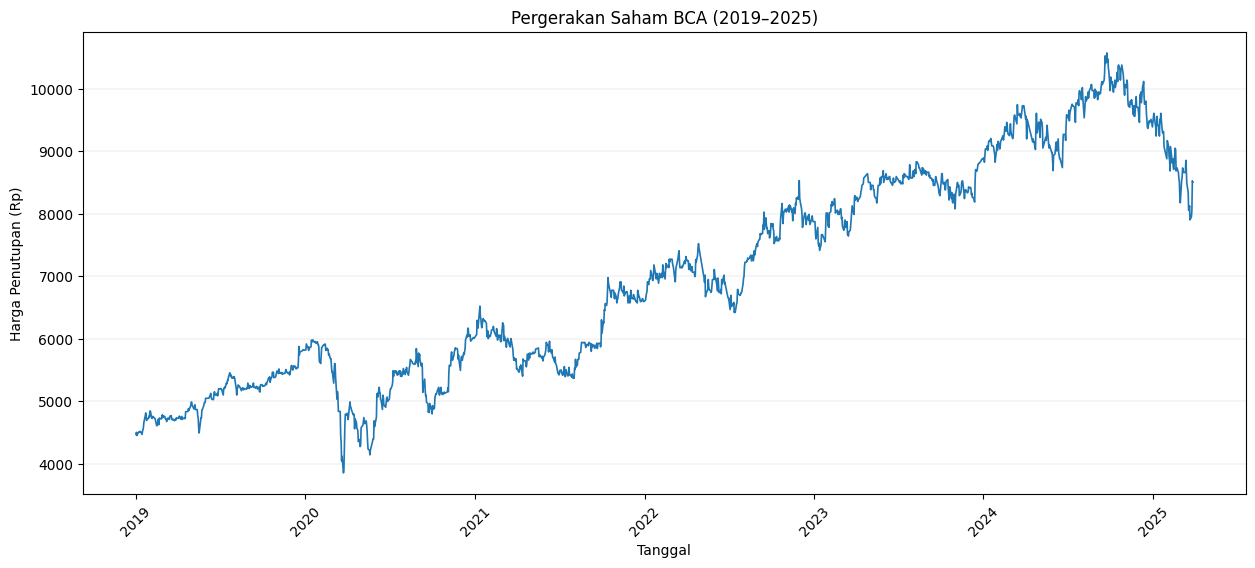

In [11]:
# Visualisasi data
import matplotlib.pyplot as plt
plt.style.use('default')

plt.figure(figsize=(15,6))
plt.title('Pergerakan Saham BCA (2019–2025)')
plt.plot(df['Date'], df['Close'], linewidth=1.2)
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (Rp)')
plt.xticks(rotation=45)
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [12]:
# Melakukan normalisasi data
sc = MinMaxScaler(feature_range=(0, 1))
data_sc = sc.fit_transform(data[['Close']].values)
data_sc

array([[0.09155023],
       [0.09666941],
       [0.08899072],
       ...,
       [0.62470931],
       [0.69543701],
       [0.6917145 ]])

In [13]:
# norm = pd.DataFrame(data_sc)
# norm.head()

In [14]:
# norm.to_excel('Hasil_Normalisasi.xlsx')

In [15]:
# Pembagian data (80% training, 10% testing, 10% validasi)
train_len = int(len(data_sc) * 0.8)
test_len = int(len(data_sc) * 0.10)
val_len = len(data_sc) - train_len - test_len

In [16]:
# Menampilkan jumlah data
print(f'Jumlah data keseluruhan: {len(data_sc)}')
print(f'Jumlah data training: {train_len}')
print(f'Jumlah data validasi: {val_len}')
print(f'Jumlah data testing:{test_len}')

Jumlah data keseluruhan: 1527
Jumlah data training: 1221
Jumlah data validasi: 154
Jumlah data testing:152


In [17]:
# Membuat Windowing pada data Training
train_data = data_sc[0:train_len  , : ]
x_train=[]
y_train = []
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i,0])
    y_train.append(train_data[i,0])

In [18]:
# Mengubah tipe data list menjadi NumPy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
# Ubah bentuk data menjadi bentuk yang diterima oleh LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [20]:
# Membuat Windowing pada data Validation
val_data = data_sc[train_len - 30:(train_len + val_len) , : ]
x_val = []
y_val = []
for i in range(30,len(val_data)):
    x_val.append(val_data[i-30:i,0])
    y_val.append(val_data[i,0])

In [21]:
# Mengubah tipe data list menjadi NumPy array
x_val, y_val = np.array(x_val), np.array(y_val)

In [22]:
# Ubah bentuk data menjadi bentuk yang diterima oleh LSTM
x_val = np.reshape(x_val, (x_val.shape[0],x_val.shape[1],1))

**1. Pemodelan dengan LSTM**

In [23]:
# Membangun model LSTM
import tensorflow as tf
from keras.layers import LSTM, Dropout, Dense, Input
from keras.models import Sequential

model_lstm = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

In [24]:
# Mendefinisikan fungsi Callback untuk model LSTM
import tensorflow as tf
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early Stopping
early_stopping_lstm = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.0001,
    verbose=1,
    restore_best_weights=True
)

# Model Checkpoint khusus untuk model LSTM
checkpoint_path_lstm = 'model_checkpoints/weights_lstm_model.weights.h5'
checkpoint_dir_lstm = os.path.dirname(checkpoint_path_lstm)
checkpoint_lstm = ModelCheckpoint(
    filepath=checkpoint_path_lstm,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [25]:
# Konfigurasi optimizer dan loss function untuk LSTM
optimizer_lstm = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

# Compile model LSTM
model_lstm.compile(optimizer=optimizer_lstm, loss='mean_squared_error')

In [26]:
# Melakukan training pada model LSTM
history_lstm = model_lstm.fit(
    x_train, y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_lstm, early_stopping_lstm]
)

Epoch 1/100
148/149 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0286
Epoch 1: val_loss improved from inf to 0.00339, saving model to model_checkpoints/weights_lstm_model.weights.h5
149/149 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0283 - val_loss: 0.0034
Epoch 2/100
148/149 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0024
Epoch 2: val_loss did not improve from 0.00339
149/149 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 0.0024 - val_loss: 0.0063
Epoch 3/100
148/149 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0022
Epoch 3: val_loss improved from 0.00339 to 0.00139, saving model to model_checkpoints/weights_lstm_model.weights.h5
149/149 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 4/100
148/149 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0018
Epoch 4: val_loss improved from 0.00139 to 0.00129, saving model to model_checkpoints/weights_lstm_model.weights.h5
149/149 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 5/100
149/149 ━━━━━━━━

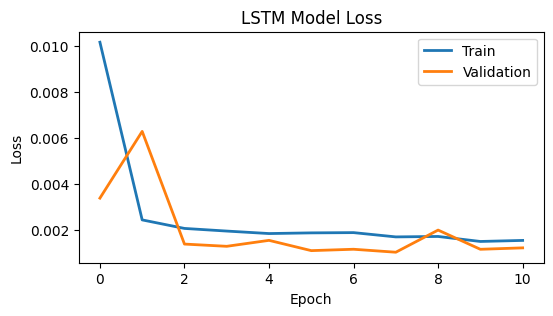

In [27]:
# Menampilkan plot nilai loss untuk model LSTM
plt.figure(figsize=(6,3))
plt.plot(history_lstm.history['loss'], linewidth=2)
plt.plot(history_lstm.history['val_loss'], linewidth=2)
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [28]:
# Membuat Windowing pada data testing
test_data = data_sc[(-test_len - 30): , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  data[['Close']].iloc[-test_len : , : ].values
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])
# Mengonversi x_test menjadi array numpy
x_test = np.array(x_test)
# Melakukan reshape untuk menambah dimensi fitur (1 fitur)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [29]:
# Mengubah tipe data list menjadi NumPy array
x_test = np.array(x_test)

In [30]:
# Ubah bentuk data menjadi bentuk yang diterima oleh LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [31]:
import os

# Cek apakah file bobot sudah ada
if os.path.exists('model_checkpoints/weights_lstm_model.weights.h5'):
    print("✅ Bobot LSTM ditemukan, memuat model...")
    model_lstm.load_weights('model_checkpoints/weights_lstm_model.weights.h5')
else:
    print("⚠️ Bobot LSTM TIDAK ditemukan, melakukan training model...")

    # Membuat folder jika belum ada
    if not os.path.exists('model_checkpoints'):
        os.makedirs('model_checkpoints')

    # Setup callback checkpoint
    checkpoint_lstm = ModelCheckpoint('model_checkpoints/weights_lstm_model.weights.h5',
                                      monitor='val_loss', mode='min',
                                      save_best_only=True, save_weights_only=True, verbose=1)
    earlystop_lstm = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Compile model
    model_lstm.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
                       loss='mean_squared_error')

    # Training model
    history_lstm = model_lstm.fit(x_train, y_train, epochs=100, batch_size=8,
                                  validation_data=(x_val, y_val),
                                  callbacks=[checkpoint_lstm, earlystop_lstm])

✅ Bobot LSTM ditemukan, memuat model...


In [32]:
# Memuat bobot model terbaik untuk LSTM
model_lstm.load_weights("/content/model_checkpoints/weights_lstm_model.weights.h5")

In [33]:
# Melakukan prediksi dengan model LSTM
y_pred_lstm = model_lstm.predict(x_test)
y_pred_lstm = np.ceil(sc.inverse_transform(y_pred_lstm))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


In [34]:
# Evaluasi menggunakan metrik MSE, RMSE, dan MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_lstm = round(mean_squared_error(y_test, y_pred_lstm), 2)
rmse_lstm = round(np.sqrt(mean_squared_error(y_test, y_pred_lstm)), 2)
mae_lstm = round(mean_absolute_error(y_test, y_pred_lstm), 2)

print("Evaluasi Model LSTM")
print(f'MSE  : {mse_lstm}')
print(f'RMSE : {rmse_lstm}')
print(f'MAE  : {mae_lstm}')

Evaluasi Model LSTM
MSE  : 92760.71
RMSE : 304.57
MAE  : 246.54


In [35]:
# DataFrame hasil prediksi LSTM
data_pred_lstm = data[-test_len:].copy()
data_pred_lstm['Prediction'] = y_pred_lstm
data_pred_lstm

,Date,Close,Prediction
1375,2024-08-15,9870.545898,9906.0
1376,2024-08-16,9967.080078,9911.0
1377,2024-08-19,10015.346680,9920.0
1378,2024-08-20,10063.613281,9932.0
1379,2024-08-21,10063.613281,9947.0
...,...,...,...
1522,2025-03-21,7900.000000,8640.0
1523,2025-03-24,7950.000000,8593.0
1524,2025-03-25,8050.000000,8544.0
1525,2025-03-26,8525.000000,8497.0


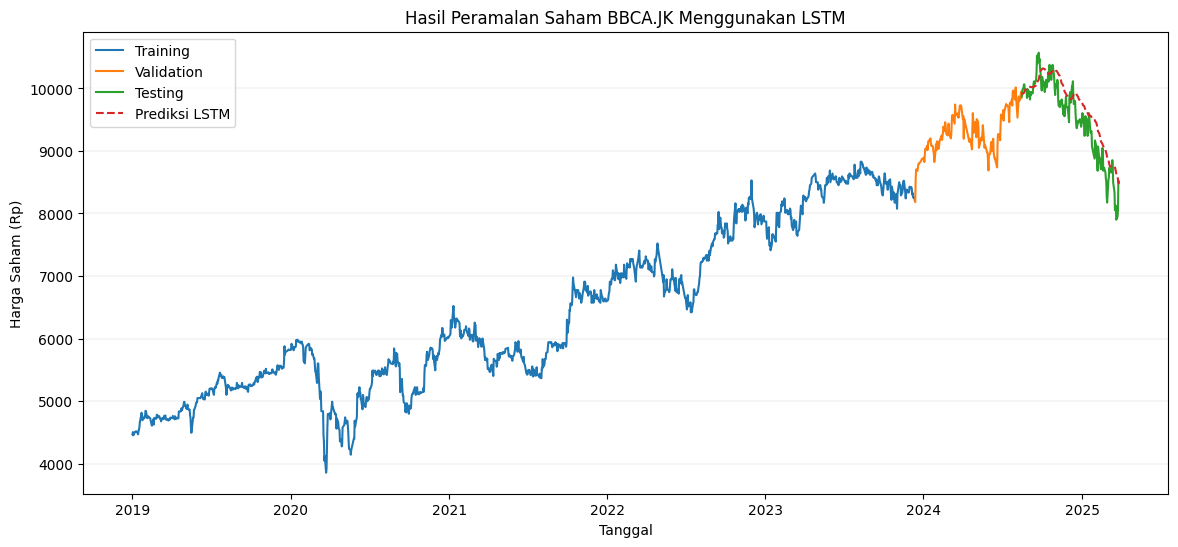

In [36]:
# Visualisasi Hasil Prediksi Saham BBCA.JK dengan LSTM
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Saham BBCA.JK Menggunakan LSTM')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred_lstm['Date'], data_pred_lstm['Close'], label='Testing')
plt.plot(data_pred_lstm['Date'], data_pred_lstm['Prediction'], label='Prediksi LSTM', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

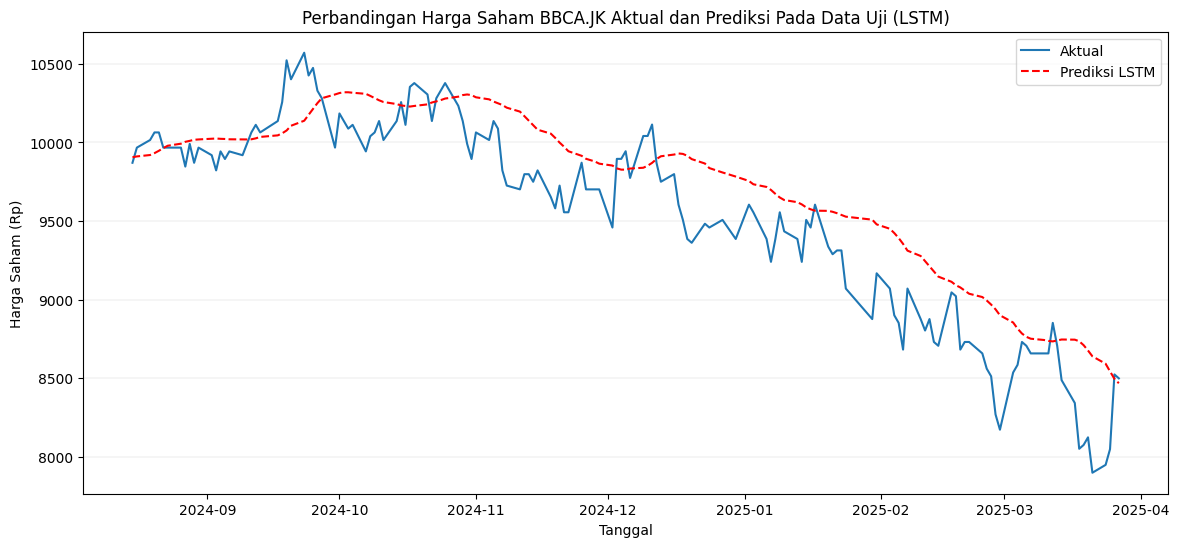

In [37]:
# Visualisasi Prediksi Data Uji Saham BBCA.JK dengan LSTM
plt.figure(figsize=(14,6))
plt.title('Perbandingan Harga Saham BBCA.JK Aktual dan Prediksi Pada Data Uji (LSTM)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.plot(data_pred_lstm['Date'], data_pred_lstm['Close'], label='Aktual')
plt.plot(data_pred_lstm['Date'], data_pred_lstm['Prediction'],
label='Prediksi LSTM', color='red', linestyle='--')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [38]:
#Prediksi 30 hari ke depan dengan LSTM
from datetime import timedelta

# Ambil data terakhir sebagai input prediksi awal
last_input = x_test[-1]  # ambil data terakhir dari test set
future_input = last_input.reshape(1, last_input.shape[0], last_input.shape[1])

# Prediksi 30 hari ke depan dengan model LSTM
future_preds = []
for _ in range(30):
    next_pred = model_lstm.predict(future_input)
    future_preds.append(next_pred[0])
    # Update input untuk prediksi berikutnya
    future_input = np.append(future_input[:, 1:, :], [[next_pred[0]]], axis=1)

# Invers transform hasil prediksi ke skala asli
future_preds_inv = sc.inverse_transform(np.array(future_preds))

# Buat tanggal 30 hari ke depan (weekday saja)
last_date = pd.to_datetime(data['Date'].iloc[-1])
future_dates = []
curr_date = last_date + timedelta(days=1)

while len(future_dates) < 30:
    if curr_date.weekday() < 5:
        future_dates.append(curr_date)
    curr_date += timedelta(days=1)

# Buat DataFrame hasil prediksi LSTM
pred_30_lstm = pd.DataFrame({
    'Date': future_dates,
    'Prediction': np.ceil(future_preds_inv.flatten())
})

# Tampilkan hasil
pred_30_lstm.head()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━

,Date,Prediction
0,2025-03-28,8469.0
1,2025-03-31,8452.0
2,2025-04-01,8444.0
3,2025-04-02,8441.0
4,2025-04-03,8442.0


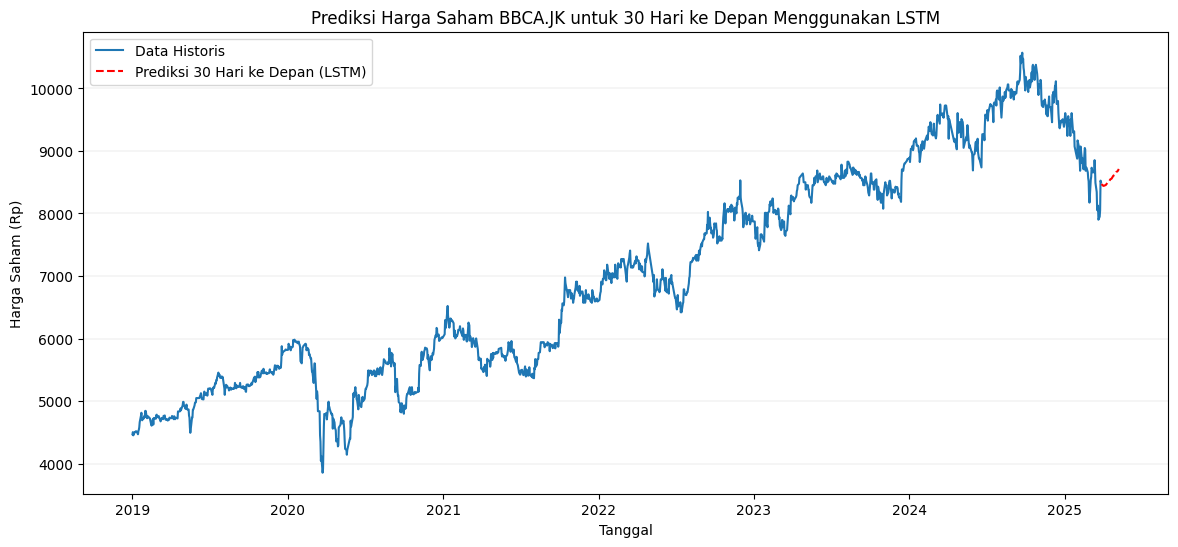

In [39]:
plt.figure(figsize=(14,6))
plt.title('Prediksi Harga Saham BBCA.JK untuk 30 Hari ke Depan Menggunakan LSTM')
plt.plot(data['Date'], data['Close'], label='Data Historis')

# Garis prediksi 30 hari ke depan
plt.plot(pred_30_lstm['Date'], pred_30_lstm['Prediction'],
         label='Prediksi 30 Hari ke Depan (LSTM)', linestyle='--',
         color='red')

plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

**2. Pemodelan dengan BI-LSTM**

In [40]:
# Membangun model BI-LSTM
from keras.layers import Dense, LSTM, Dropout, Bidirectional, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import tensorflow as tf

# Model Bi-LSTM
model_bilstm = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    Bidirectional(LSTM(100, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(100, return_sequences=False)),
    Dropout(0.2),
    Dense(1)
])

In [41]:
# Mendefenisikan fungsi Callback
import tensorflow as tf
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-4,
    verbose=1,
    restore_best_weights=True
)

# Path simpan model terbaik
checkpoint_path_bilstm = 'model_checkpoints/weights_bilstm_model.weights.h5'
os.makedirs(os.path.dirname(checkpoint_path_bilstm), exist_ok=True)

# Model checkpoint
checkpoint_bilstm = ModelCheckpoint(
    filepath=checkpoint_path_bilstm,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

In [42]:
# Konfigurasi optimizer dan loss function serta Compile Model
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model_bilstm.compile(optimizer=optimizer, loss='mean_squared_error')

In [43]:
# Training model Bi-LSTM
history_bilstm = model_bilstm.fit(
    x_train, y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_bilstm, early_stopping]
)

Epoch 1/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0240
Epoch 1: val_loss improved from inf to 0.00185, saving model to model_checkpoints/weights_bilstm_model.weights.h5
149/149 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - loss: 0.0239 - val_loss: 0.0019
Epoch 2/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0019
Epoch 2: val_loss did not improve from 0.00185
149/149 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - loss: 0.0019 - val_loss: 0.0031
Epoch 3/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0017
Epoch 3: val_loss did not improve from 0.00185
149/149 ━━━━━━━━━━━━━━━━━━━━ 20s 76ms/step - loss: 0.0017 - val_loss: 0.0025
Epoch 4/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0017
Epoch 4: val_loss improved from 0.00185 to 0.00155, saving model to model_checkpoints/weights_bilstm_model.weights.h5
149/149 ━━━━━━━━━━━━━━━━━━━━ 20s 75ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 5/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0015
Epoch 5: val_loss did

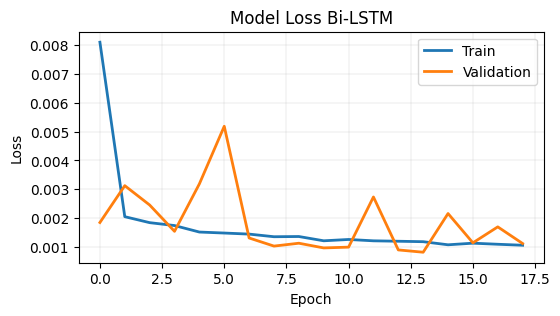

In [44]:
# Menampilkan plot nilai loss
plt.figure(figsize=(6,3))
plt.plot(history_bilstm.history['loss'], linewidth=2)
plt.plot(history_bilstm.history['val_loss'], linewidth=2)
plt.title('Model Loss Bi-LSTM')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid(True, linewidth=0.18)
plt.show()

In [45]:
# Windowing pada data testing
test_data = data_sc[-(test_len + 30):, :]  # ambil data testing + 30 hari sebelumnya
x_test = []
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# y_test: ambil nilai Close asli untuk dibandingkan nanti
y_test = df[['Close']].iloc[-test_len:].values


In [46]:
# Mengubah tipe data list menjadi NumPy array
x_test = np.array(x_test)

In [47]:
# Ubah bentuk data menjadi bentuk yang diterima oleh LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [48]:
# Load bobot model terbaik
model_bilstm.load_weights("/content/model_checkpoints/weights_bilstm_model.weights.h5")

In [49]:
# Melakukan prediksi
y_pred_bilstm = model_bilstm.predict(x_test)
y_pred_bilstm = np.ceil(sc.inverse_transform(y_pred_bilstm))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step


In [52]:
# Evaluasi menggunakan metrik MSE, RMSE, dan MAE untuk Bi-LSTM
mse_bilstm = round(mean_squared_error(y_test, y_pred_bilstm), 2)
rmse_bilstm = round(np.sqrt(np.mean((y_test - y_pred_bilstm) ** 2)), 2)
mae_bilstm = round(mean_absolute_error(y_test, y_pred_bilstm), 2)

# Cetak hasil evaluasi
print("Evaluasi Model Bi-LSTM")
print(f'MSE  : {mse_bilstm}')
print(f'RMSE : {rmse_bilstm}')
print(f'MAE  : {mae_bilstm}')

Evaluasi Model Bi-LSTM
MSE  : 66307.49
RMSE : 257.5
MAE  : 204.36


In [53]:
# Buat DataFrame hasil prediksi Bi-LSTM
data_pred_bilstm = df[-test_len:].copy()
data_pred_bilstm['Prediction'] = y_pred_bilstm

# Tampilkan jumlah total baris
print(f"Jumlah baris prediksi: {len(data_pred_bilstm)}")

# Jika ingin tampilkan seluruh DataFrame
from IPython.display import display
display(data_pred_bilstm)


Jumlah baris prediksi: 152


,Date,Close,High,Low,Open,Volume,Prediction
1375,2024-08-15,9870.545898,9942.945991,9822.279170,9846.412534,33396600,9858.0
1376,2024-08-16,9967.080078,9967.080078,9894.679981,9942.946712,40731400,9865.0
1377,2024-08-19,10015.346680,10063.613411,9918.813218,9967.079949,51054400,9880.0
1378,2024-08-20,10063.613281,10087.746646,9942.946455,9967.079821,60304400,9899.0
1379,2024-08-21,10063.613281,10136.013377,10063.613281,10136.013377,84848800,9922.0
...,...,...,...,...,...,...,...
1522,2025-03-21,7900.000000,8275.000000,7900.000000,8275.000000,377916400,8550.0
1523,2025-03-24,7950.000000,8100.000000,7625.000000,7825.000000,331836800,8485.0
1524,2025-03-25,8050.000000,8150.000000,8000.000000,8075.000000,136341700,8428.0
1525,2025-03-26,8525.000000,8650.000000,8275.000000,8300.000000,283104600,8385.0


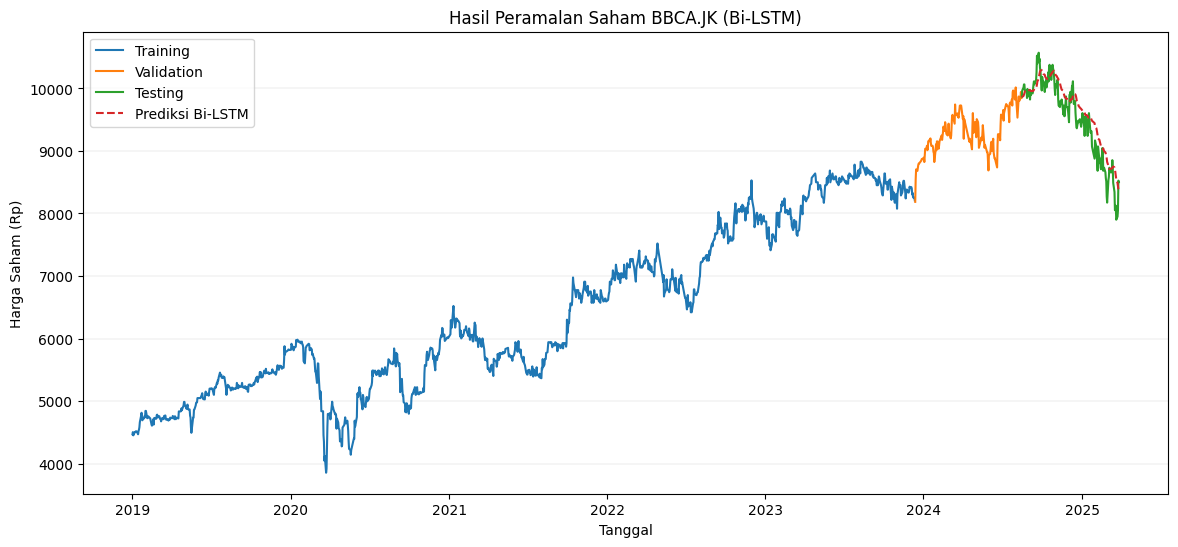

In [54]:
# Visualisasi Prediksi
train = df[:train_len]
valid = df[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Saham BBCA.JK (Bi-LSTM)')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred_bilstm['Date'], data_pred_bilstm['Close'], label='Testing')
plt.plot(data_pred_bilstm['Date'], data_pred_bilstm['Prediction'], label='Prediksi Bi-LSTM', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

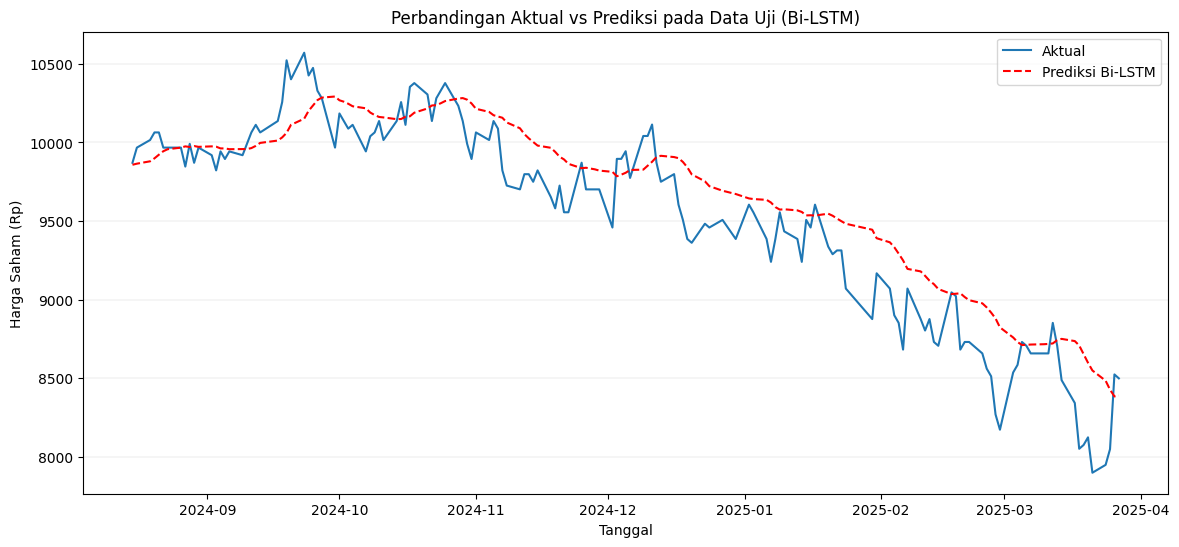

In [55]:
# Visualisasi Prediksi
plt.figure(figsize=(14,6))
plt.title('Perbandingan Aktual vs Prediksi pada Data Uji (Bi-LSTM)')
plt.plot(data_pred_bilstm['Date'], data_pred_bilstm['Close'], label='Aktual')
plt.plot(data_pred_bilstm['Date'], data_pred_bilstm['Prediction'], label='Prediksi Bi-LSTM', color='red', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━

,Date,Prediction
0,2025-03-28,8402.0
1,2025-03-29,8408.0
2,2025-03-30,8416.0
3,2025-03-31,8427.0
4,2025-04-01,8439.0
5,2025-04-02,8451.0
6,2025-04-03,8463.0
7,2025-04-04,8476.0
8,2025-04-05,8489.0
9,2025-04-06,8502.0


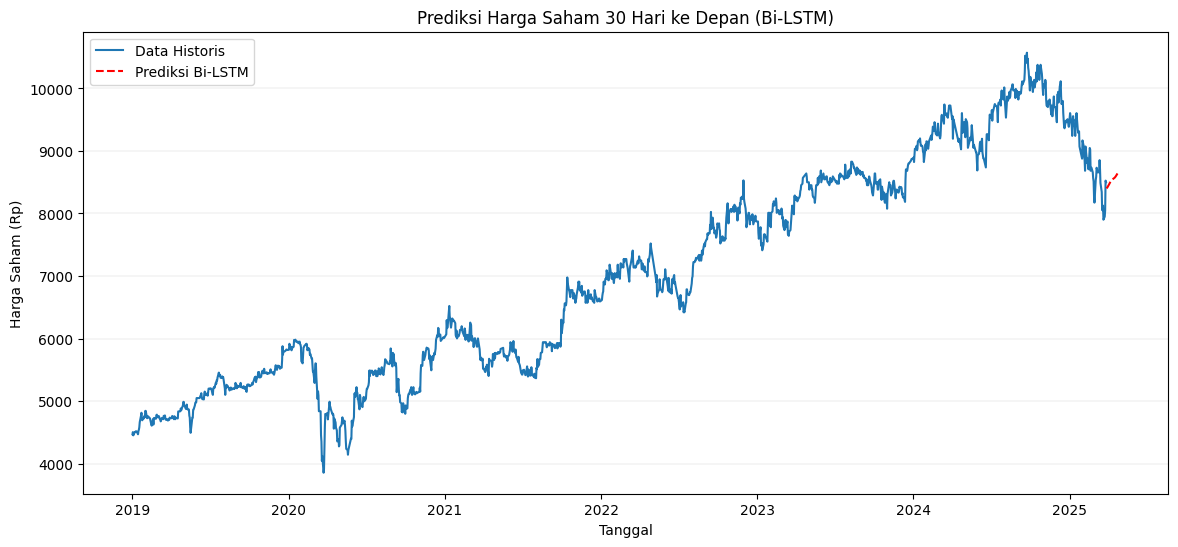

In [57]:
# === PREDIKSI 30 HARI KE DEPAN MENGGUNAKAN BI-LSTM ===
from datetime import timedelta

# Langkah prediksi
future_steps = 30
last_30_days = data_sc[-30:]  # ambil 30 data terakhir dari dataset
future_preds = []

# Format input awal
input_seq = last_30_days.reshape(1, 30, 1)

# Loop prediksi hari ke hari
for _ in range(future_steps):
    next_pred = model_bilstm.predict(input_seq)[0][0]
    future_preds.append(next_pred)

    # Update input_seq dengan prediksi baru
    next_input = np.append(input_seq[0, 1:], [[next_pred]], axis=0)
    input_seq = next_input.reshape(1, 30, 1)

# Invers normalisasi agar kembali ke nilai asli
future_preds_actual = np.ceil(sc.inverse_transform(np.array(future_preds).reshape(-1,1)))

# Buat tanggal untuk 30 hari ke depan
last_date = df['Date'].max()
future_dates = [last_date + timedelta(days=i+1) for i in range(future_steps)]

# DataFrame hasil prediksi
future_df_bilstm = pd.DataFrame({
    'Date': future_dates,
    'Prediction': future_preds_actual.flatten()
})

# Tampilkan hasil prediksi
print("=== Prediksi 30 Hari ke Depan (Bi-LSTM) ===")
display(future_df_bilstm)

# Visualisasi hasil prediksi ke depan
plt.figure(figsize=(14,6))
plt.title('Prediksi Harga Saham 30 Hari ke Depan (Bi-LSTM)')
plt.plot(df['Date'], df['Close'], label='Data Historis')
plt.plot(future_df_bilstm['Date'], future_df_bilstm['Prediction'], label='Prediksi Bi-LSTM', linestyle='--', color='red')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()


**3. Pemodelan dengan Stacked LSTM**

In [64]:
# Membangun Model Stacked LSTM
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout, Bidirectional, Input
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os

model_stacked_lstm = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

In [65]:
# Callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-4,
    verbose=1,
    restore_best_weights=True
)

checkpoint_path_bigru = 'model_checkpoints/weights_stacked_lstm.weights.h5'
os.makedirs(os.path.dirname(checkpoint_path_bigru), exist_ok=True)

checkpoint_bigru = ModelCheckpoint(
    filepath=checkpoint_path_bigru,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

In [67]:
# Konfigurasi Optimizer dan Loss Function untuk Stacked LSTM
op = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

# Compile Model stacked LSTM
model_stacked_lstm.compile(optimizer=op, loss='mean_squared_error')

In [69]:
# Training model
history_stacked_lstm = model_stacked_lstm.fit(
    x_train, y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_bigru, early_stopping]
)

Epoch 1/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0602
Epoch 1: val_loss improved from inf to 0.00148, saving model to model_checkpoints/weights_stacked_lstm.weights.h5
149/149 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0599 - val_loss: 0.0015
Epoch 2/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0024
Epoch 2: val_loss did not improve from 0.00148
149/149 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0024 - val_loss: 0.0040
Epoch 3/100
148/149 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0026
Epoch 3: val_loss improved from 0.00148 to 0.00126, saving model to model_checkpoints/weights_stacked_lstm.weights.h5
149/149 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 0.0026 - val_loss: 0.0013
Epoch 4/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0022
Epoch 4: val_loss did not improve from 0.00126
149/149 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0022 - val_loss: 0.0013
Epoch 5/100
148/149 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0017
Epoch 5: val_loss did no

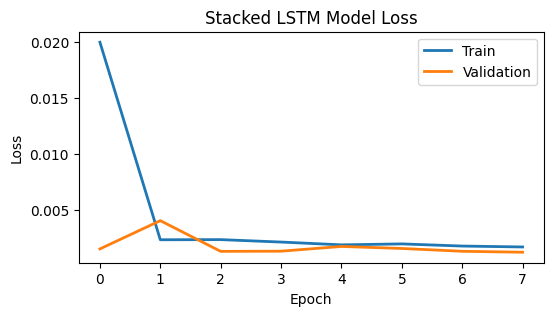

In [71]:
# Menampilkan plot nilai loss untuk Stacked LSTM
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
plt.plot(history_stacked_lstm.history['loss'], linewidth=2)       # Loss pada data training
plt.plot(history_stacked_lstm.history['val_loss'], linewidth=2)   # Loss pada data validasi

plt.title('Stacked LSTM Model Loss')  # Judul yang relevan dengan stacked LSTM
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [72]:
# Windowing pada data testing untuk Stacked LSTM
test_data = data_sc[-(test_len + 30):, :]  # ambil data testing + 30 hari sebelumnya
x_test = []
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [73]:
# Target asli (label)
y_test = df[['Close']].iloc[-test_len:].values

In [75]:
# Load bobot model Stacked LSTM terbaik
model_stacked_lstm.load_weights('/content/model_checkpoints/weights_stacked_lstm.weights.h5')

In [76]:
# Melakukan prediksi dengan model Stacked LSTM
y_pred_stacked_lstm = model_stacked_lstm.predict(x_test)

# Mengembalikan hasil prediksi ke skala asli
y_pred_stacked_lstm = np.ceil(sc.inverse_transform(y_pred_stacked_lstm))

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step


In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Evaluasi menggunakan metrik MSE, RMSE, dan MAE untuk Stacked LSTM
mse_stacked = round(mean_squared_error(y_test, y_pred_stacked_lstm), 2)
rmse_stacked = round(np.sqrt(np.mean((y_test - y_pred_stacked_lstm) ** 2)), 2)
mae_stacked = round(mean_absolute_error(y_test, y_pred_stacked_lstm), 2)

# Cetak hasil evaluasi
print("Evaluasi Model Stacked LSTM")
print(f'MSE  : {mse_stacked}')
print(f'RMSE : {rmse_stacked}')
print(f'MAE  : {mae_stacked}')


Evaluasi Model Stacked LSTM
MSE  : 124211.76
RMSE : 352.44
MAE  : 291.86


In [78]:
# Membuat DataFrame hasil prediksi Stacked LSTM
data_pred_stacked_lstm = data[-test_len:].copy()
data_pred_stacked_lstm['Prediction'] = y_pred_stacked_lstm
data_pred_stacked_lstm

,Date,Close,Prediction
1375,2024-08-15,9870.545898,9980.0
1376,2024-08-16,9967.080078,9986.0
1377,2024-08-19,10015.346680,9994.0
1378,2024-08-20,10063.613281,10006.0
1379,2024-08-21,10063.613281,10021.0
...,...,...,...
1522,2025-03-21,7900.000000,8692.0
1523,2025-03-24,7950.000000,8645.0
1524,2025-03-25,8050.000000,8594.0
1525,2025-03-26,8525.000000,8546.0


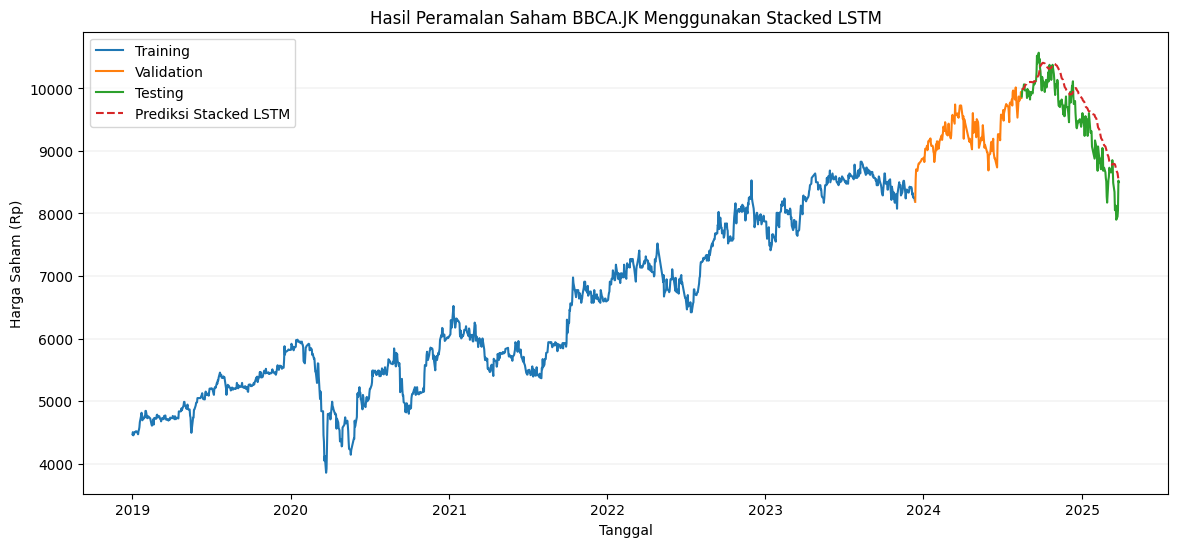

In [79]:
# Visualisasi Hasil Prediksi Saham BBCA.JK dengan Stacked LSTM
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Saham BBCA.JK Menggunakan Stacked LSTM')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred_stacked_lstm['Date'], data_pred_stacked_lstm['Close'], label='Testing')
plt.plot(data_pred_stacked_lstm['Date'], data_pred_stacked_lstm['Prediction'],
         label='Prediksi Stacked LSTM', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

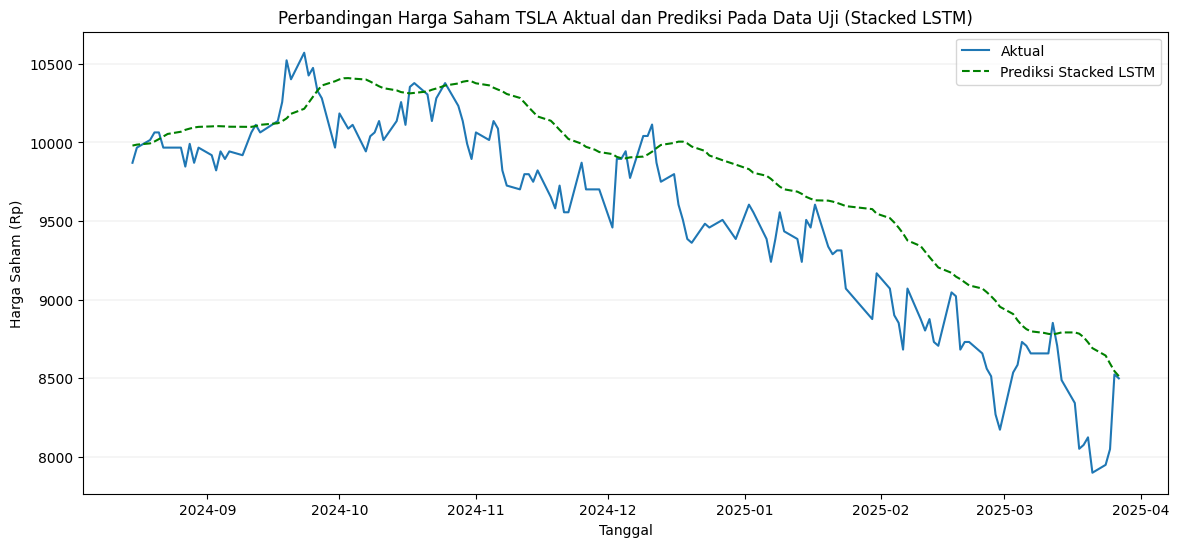

In [80]:
# Visualisasi Prediksi Data Uji Saham TSLA dengan Stacked LSTM
plt.figure(figsize=(14,6))
plt.title('Perbandingan Harga Saham TSLA Aktual dan Prediksi Pada Data Uji (Stacked LSTM)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')

# Plot data aktual dan prediksi Stacked LSTM
plt.plot(data_pred_stacked_lstm['Date'], data_pred_stacked_lstm['Close'], label='Aktual')
plt.plot(data_pred_stacked_lstm['Date'], data_pred_stacked_lstm['Prediction'],
         label='Prediksi Stacked LSTM', color='green', linestyle='--')

plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [81]:
from datetime import timedelta

# Ambil data terakhir sebagai input prediksi awal
last_input = x_test[-1]  # ambil data terakhir dari test set
future_input = last_input.reshape(1, last_input.shape[0], last_input.shape[1])

# Prediksi 30 hari ke depan dengan model Stacked LSTM
future_preds_stacked = []

for _ in range(30):
    next_pred = model_stacked_lstm.predict(future_input)
    future_preds_stacked.append(next_pred[0])

    # Update input untuk prediksi berikutnya
    future_input = np.append(future_input[:, 1:, :], [[next_pred[0]]], axis=1)

# Invers transform hasil prediksi ke skala asli
future_preds_inv_stacked = sc.inverse_transform(future_preds_stacked)

# Buat tanggal 30 hari ke depan (weekday saja)
last_date = pd.to_datetime(data['Date'].iloc[-1])
future_dates = []
curr_date = last_date + timedelta(days=1)

while len(future_dates) < 30:
    if curr_date.weekday() < 5:  # weekday: Senin-Jumat (0–4)
        future_dates.append(curr_date)
    curr_date += timedelta(days=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━

In [82]:
# DataFrame hasil prediksi Stacked LSTM
pred_30_stacked = pd.DataFrame({
    'Date': future_dates,
    'Prediction': np.ceil(future_preds_inv_stacked.flatten())
})

# Tampilkan hasil
pred_30_stacked.head()

,Date,Prediction
0,2025-03-28,8514.0
1,2025-03-31,8495.0
2,2025-04-01,8487.0
3,2025-04-02,8486.0
4,2025-04-03,8490.0


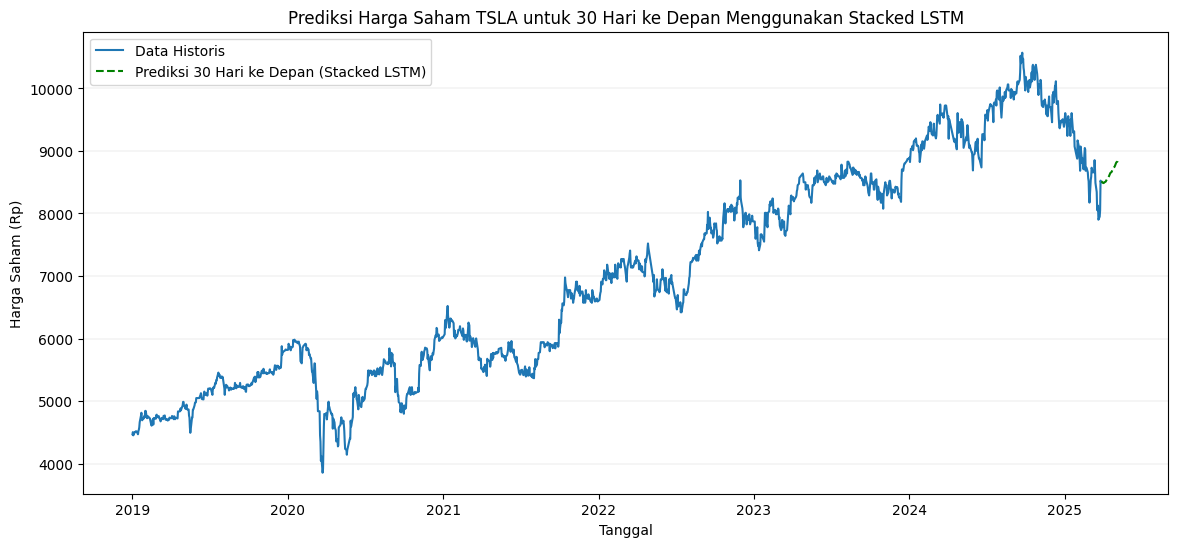

In [83]:
# Prediksi Harga Saham TSLA untuk 30 Hari ke Depan Stacked LSTM
plt.figure(figsize=(14,6))
plt.title('Prediksi Harga Saham TSLA untuk 30 Hari ke Depan Menggunakan Stacked LSTM')
plt.plot(data['Date'], data['Close'], label='Data Historis')

# Garis prediksi 30 hari ke depan
plt.plot(pred_30_stacked['Date'], pred_30_stacked['Prediction'],
         label='Prediksi 30 Hari ke Depan (Stacked LSTM)', linestyle='--',
    color='green')

plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

**4. Perbandingan Model LSTM, BI-LSTM dan Stacked LSTM**

In [88]:
# Evaluasi Metrik untuk LSTM
print("=== Evaluasi Model LSTM ===")
print(f'MSE : {mse_lstm}')
print(f'RMSE : {rmse_lstm}')
print(f'MAE : {mae_lstm}')

# Evaluasi Metrik untuk Bi-LSTM
print("=== Evaluasi Model Bi-LSTM ===")
print(f'MSE : {mse_bilstm}')
print(f'RMSE : {rmse_bilstm}')
print(f'MAE : {mae_bilstm}')

# Evaluasi Metrik untuk Stacked LSTM
print("=== Evaluasi Model Stacked LSTM ===")
print(f'MSE : {mse_stacked}')
print(f'RMSE : {rmse_stacked}')
print(f'MAE : {mae_stacked}')


=== Evaluasi Model LSTM ===
MSE : 92760.71
RMSE : 304.57
MAE : 246.54
=== Evaluasi Model Bi-LSTM ===
MSE : 66307.49
RMSE : 257.5
MAE : 204.36
=== Evaluasi Model Stacked LSTM ===
MSE : 124211.76
RMSE : 352.44
MAE : 291.86


In [89]:
import time

# Waktu training untuk LSTM
start_lstm = time.time()
history_lstm = model_lstm.fit(x_train, y_train, batch_size=8, epochs=100,
                              validation_data=(x_val, y_val), callbacks=[checkpoint, early_stopping])
end_lstm = time.time()
print(f"Training Time for LSTM: {end_lstm - start_lstm:.2f} seconds")

# Waktu training untuk Bi-LSTM
start_bilstm = time.time()
history_bilstm = model_bilstm.fit(x_train, y_train, batch_size=8, epochs=100,
                                    validation_data=(x_val, y_val), callbacks=[checkpoint, early_stopping])
end_bilstm = time.time()
print(f"Training Time for Bi-LSTM: {end_bilstm - start_bilstm:.2f} seconds")

# Waktu training untuk Stacked LSTM
start_stacked = time.time()
history_stacked = model_stacked_lstm.fit(x_train, y_train, batch_size=8, epochs=100,
                                         validation_data=(x_val, y_val), callbacks=[checkpoint, early_stopping])
end_stacked = time.time()
print(f"Training Time for Stacked LSTM: {end_stacked - start_stacked:.2f} seconds")

Epoch 1/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0015
Epoch 1: val_loss did not improve from 0.00078
149/149 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 2/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0016
Epoch 2: val_loss did not improve from 0.00078
149/149 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 3/100
148/149 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0015
Epoch 3: val_loss did not improve from 0.00078
149/149 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 4/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0015
Epoch 4: val_loss did not improve from 0.00078
149/149 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 5/100
148/149 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0015
Epoch 5: val_loss did not improve from 0.00078
149/149 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0015 - val_loss: 0.0055
Epoch 6/100
149/149 ━━━━━━━━━━━━━━━━━━━

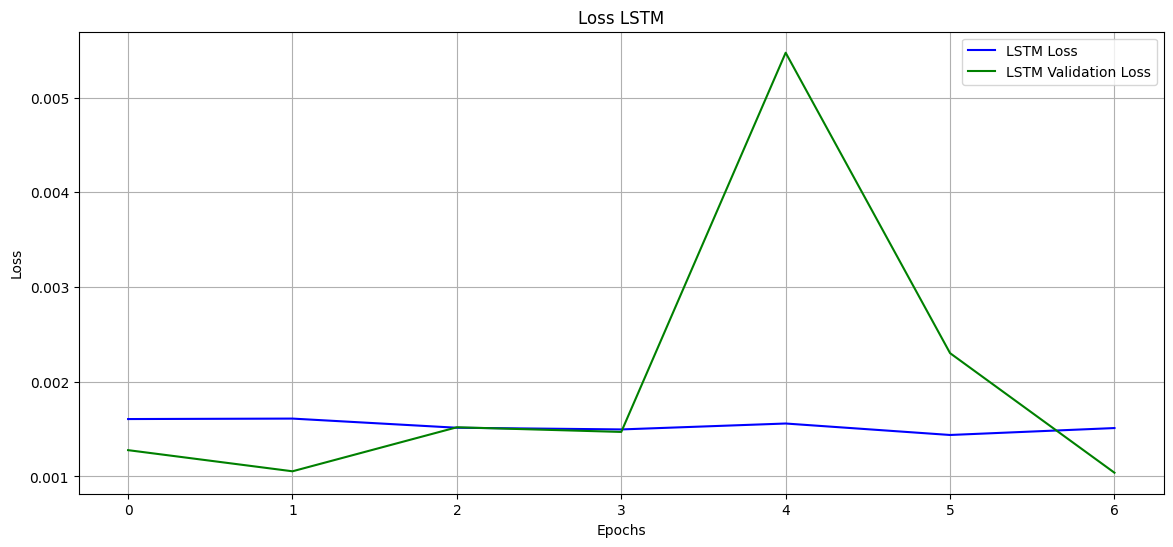

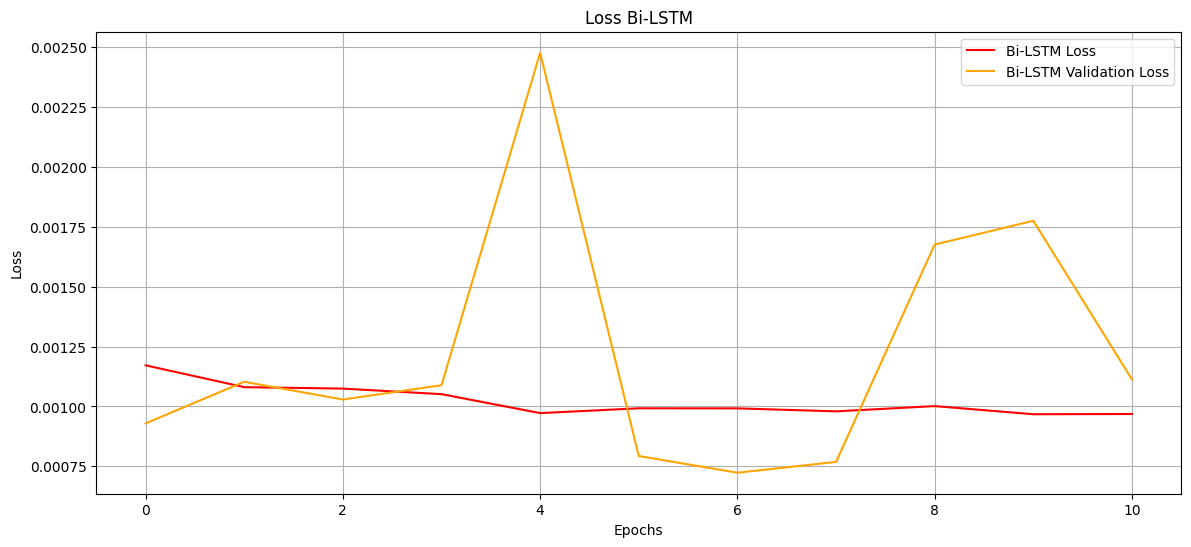

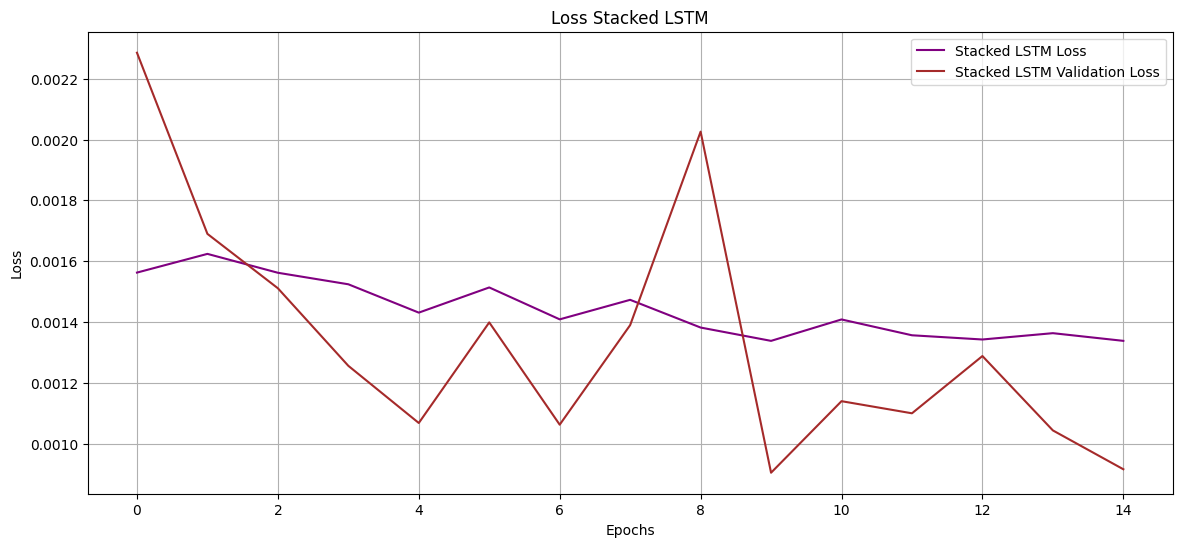

In [92]:
# Grafik loss untuk LSTM
plt.figure(figsize=(14,6))
plt.plot(history_lstm.history['loss'], label='LSTM Loss', color='blue')
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss', color='green')
plt.title('Loss LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Grafik loss untuk Bi-LSTM
plt.figure(figsize=(14,6))
plt.plot(history_bilstm.history['loss'], label='Bi-LSTM Loss', color='red')
plt.plot(history_bilstm.history['val_loss'], label='Bi-LSTM Validation Loss', color='orange')
plt.title('Loss Bi-LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Grafik loss untuk Stacked LSTM
plt.figure(figsize=(14,6))
plt.plot(history_stacked.history['loss'], label='Stacked LSTM Loss', color='purple')
plt.plot(history_stacked.history['val_loss'], label='Stacked LSTM Validation Loss', color='brown')
plt.title('Loss Stacked LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

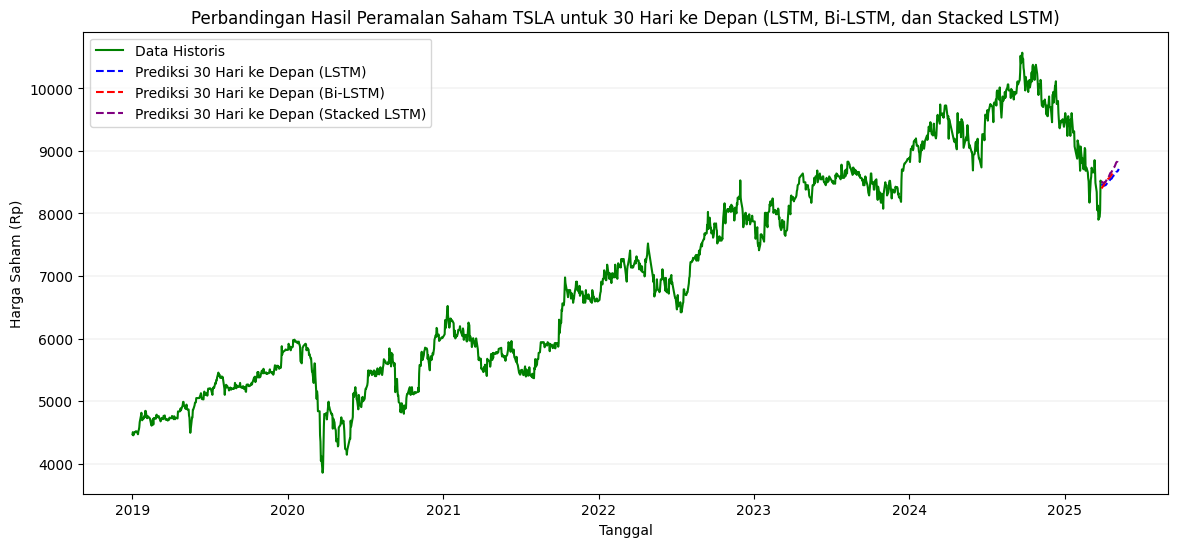

In [94]:
# Visualisasi Perbandingan Hasil Prediksi Saham TSLA untuk 30 Hari ke Depan (LSTM, Bi-LSTM, dan Stacked LSTM)
plt.figure(figsize=(14,6))
plt.title('Perbandingan Hasil Peramalan Saham TSLA untuk 30 Hari ke Depan (LSTM, Bi-LSTM, dan Stacked LSTM)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')

# Plotkan harga saham historis
plt.plot(data['Date'], data['Close'], label='Data Historis', color='green')

# Plotkan prediksi menggunakan LSTM
plt.plot(pred_30_lstm['Date'], pred_30_lstm['Prediction'],
         label='Prediksi 30 Hari ke Depan (LSTM)', linestyle='--', color='blue')

# Plotkan prediksi menggunakan Bi-LSTM
plt.plot(future_df_bilstm['Date'], future_df_bilstm['Prediction'],
         label='Prediksi 30 Hari ke Depan (Bi-LSTM)', linestyle='--', color='red')

# Plotkan prediksi menggunakan Stacked LSTM
plt.plot(pred_30_stacked['Date'], pred_30_stacked['Prediction'],
         label='Prediksi 30 Hari ke Depan (Stacked LSTM)', linestyle='--', color='purple')

# Menambahkan legend dan grid
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()